In [266]:
#Importing the requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [267]:
#Extending maximum number of rows and columns displayed
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 75)

# Importing the dataset

In [268]:
bike_share_df = pd.read_csv('day.csv')

# Understand and visualizing data

In [269]:
bike_share_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [270]:
bike_share_df.info() #Checking for numbere of columns and null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [271]:
bike_share_df.isnull().sum() # Finding number of nulls

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Here we can observe no null values present in any columns

In [272]:
bike_share_df.shape #Checking the shape

(730, 16)

In [273]:
bike_share_df.describe() #Checkig the columns with numerical data with few arthematic ways

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Now dropping the unwanted columns

In [274]:
bike_share_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [275]:
bike_share_df.nunique().sort_values(ascending=True) #Single valued columns are displayed in the top

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

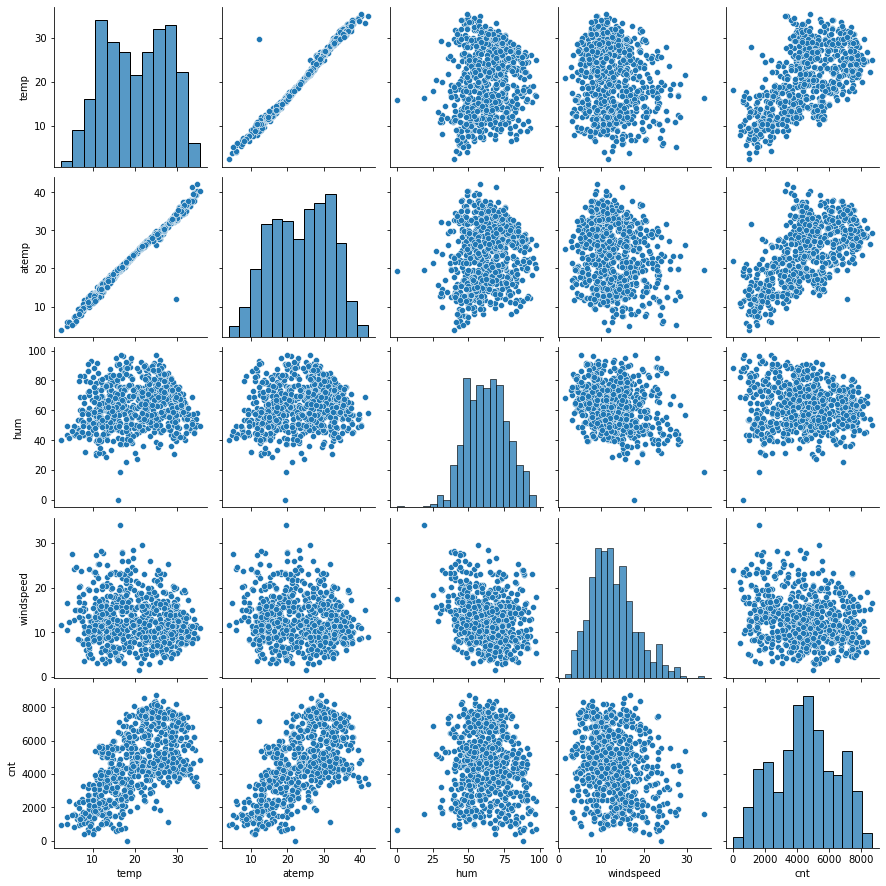

In [276]:
# Lets see the continuous variables

sns.pairplot(bike_share_df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [277]:
bike_share_df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [278]:
bike_share_df = bike_share_df.drop(['instant'], axis = 1)     # Dropping index column as it is not required for analysis

In [279]:
bike_share_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [280]:
bike_share_df = bike_share_df.drop(['dteday'], axis = 1)
# As month and year are already present this is not required for analysis

In [281]:
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [282]:
bike_share_df = bike_share_df.drop(['casual','registered'], axis = 1) 

#As we have cnt which is our target variable and cnt is the sum of both causal and registered we can remove them

In [283]:
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [284]:
bike_share_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

<AxesSubplot:xlabel='season', ylabel='cnt'>

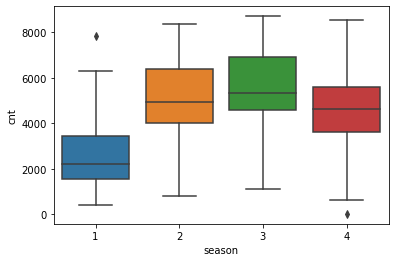

In [285]:
# Boxplot of season which is a categorical variable

plt.figure()
sns.boxplot(x = 'season', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='season', ylabel='cnt'>

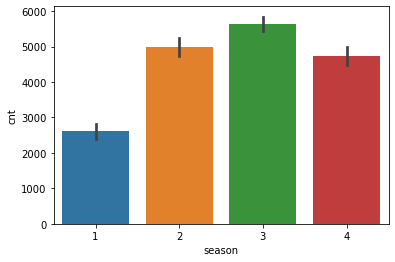

In [286]:
# Barplot of season which is a categorical variable

plt.figure()
sns.barplot(x = 'season', y = 'cnt', data = bike_share_df)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

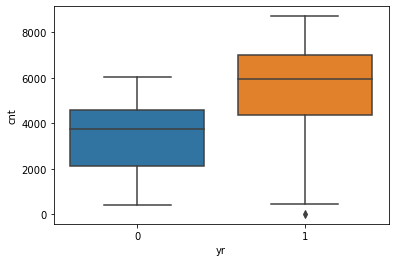

In [287]:
# Boxplot of yr which is a categorical variable

plt.figure()
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='yr', ylabel='cnt'>

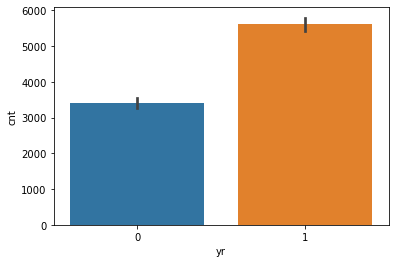

In [288]:
# Barplot of yr which is a categorical variable

plt.figure()
sns.barplot(x = 'yr', y = 'cnt', data = bike_share_df)

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

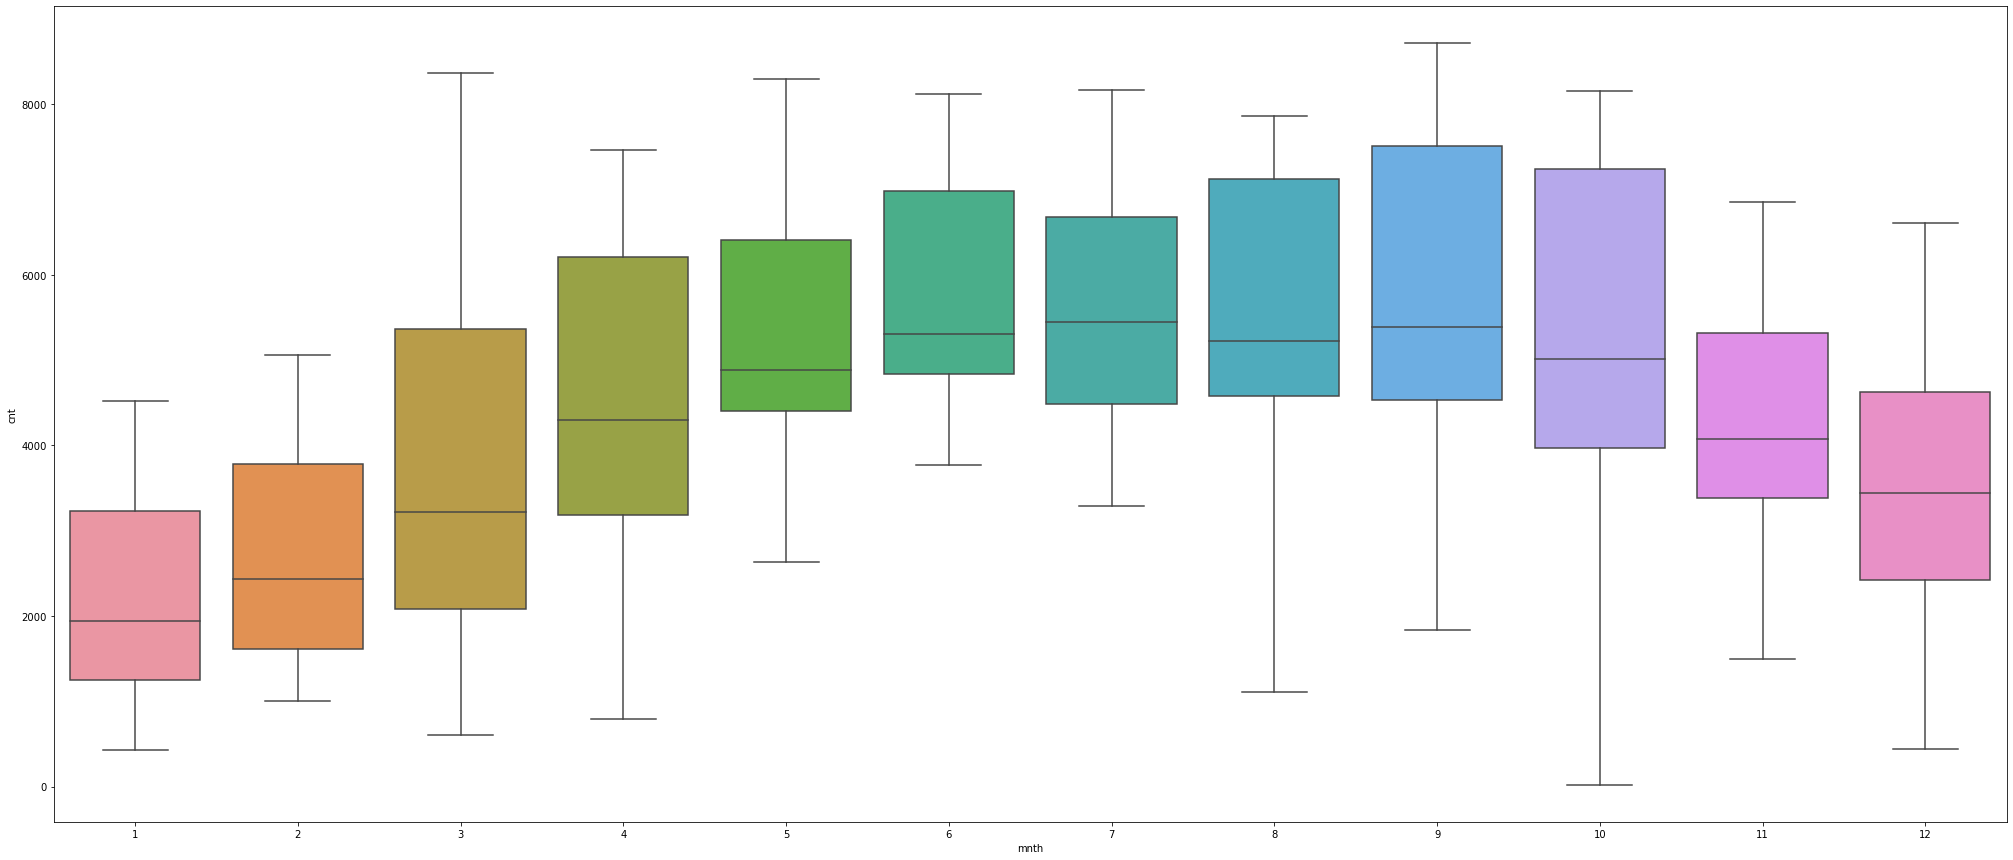

In [289]:
# Boxplot of mnth which is a categorical variable

plt.figure(figsize=(35, 15))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

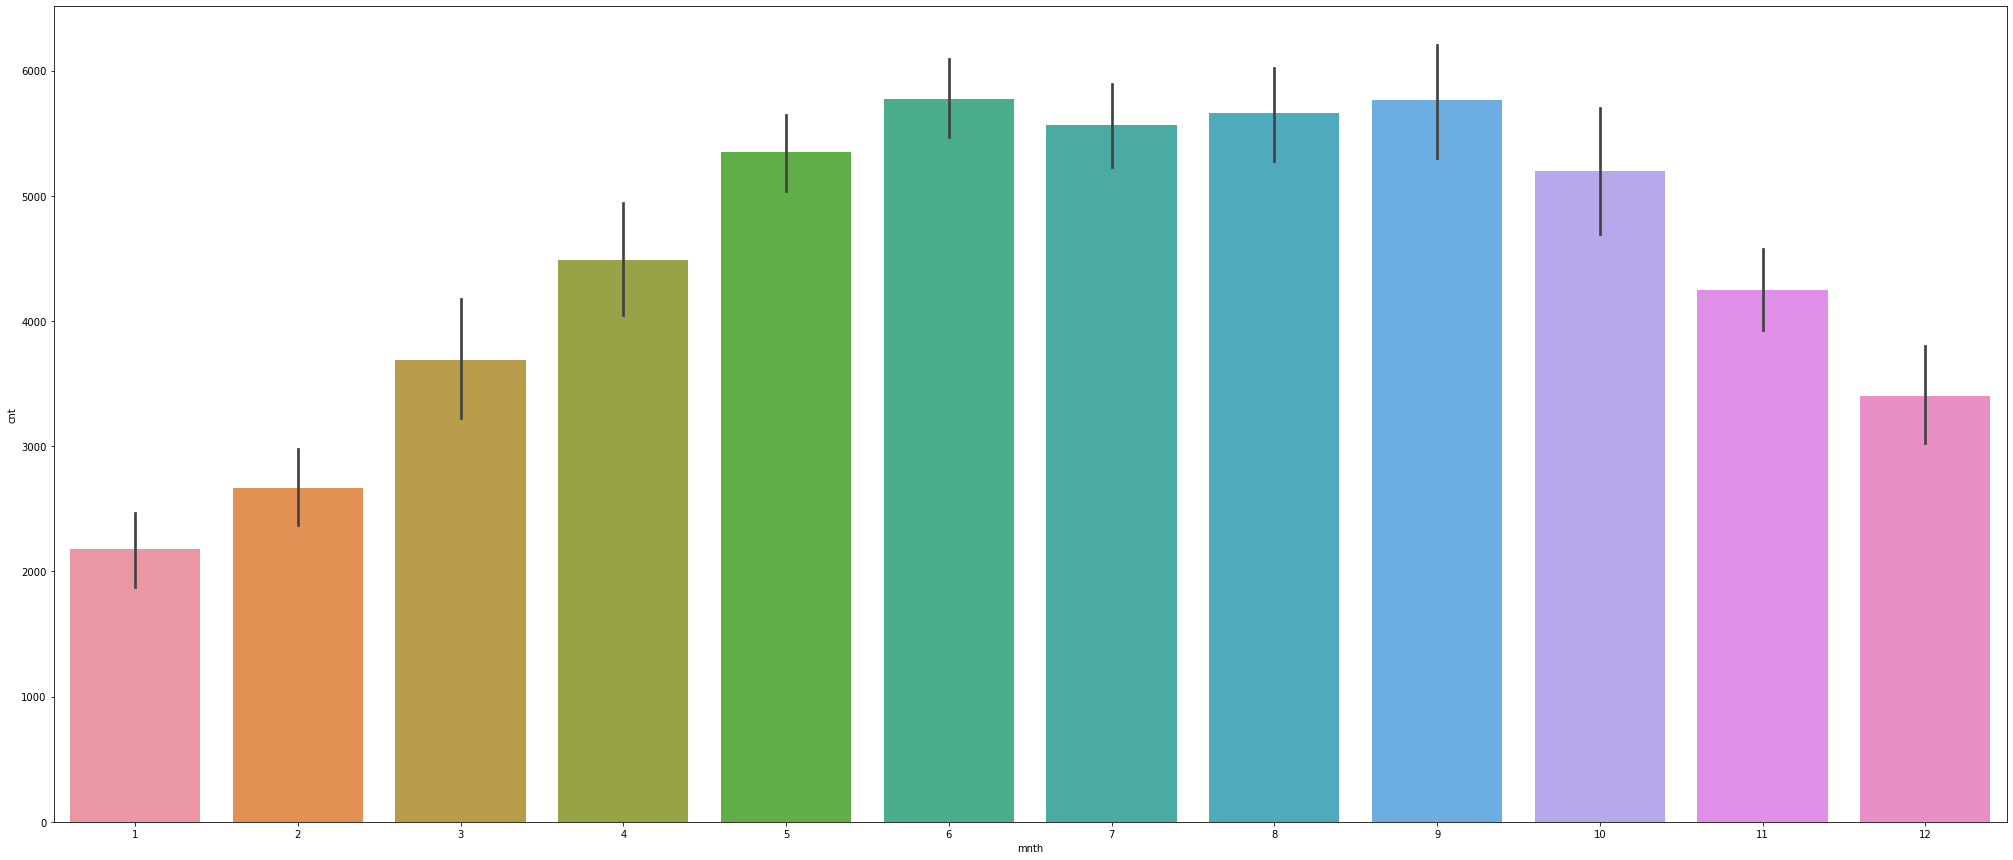

In [290]:
# Barplot of mnth which is a categorical variable

plt.figure(figsize=(35, 15))
sns.barplot(x = 'mnth', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

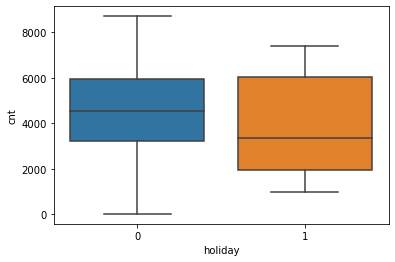

In [291]:
# Boxplot of holiday which is a categorical variable

plt.figure()
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

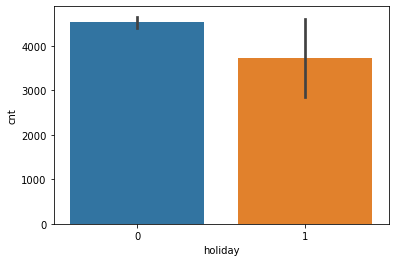

In [292]:
# Barplot of holiday which is a categorical variable

plt.figure()
sns.barplot(x = 'holiday', y = 'cnt', data = bike_share_df)

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

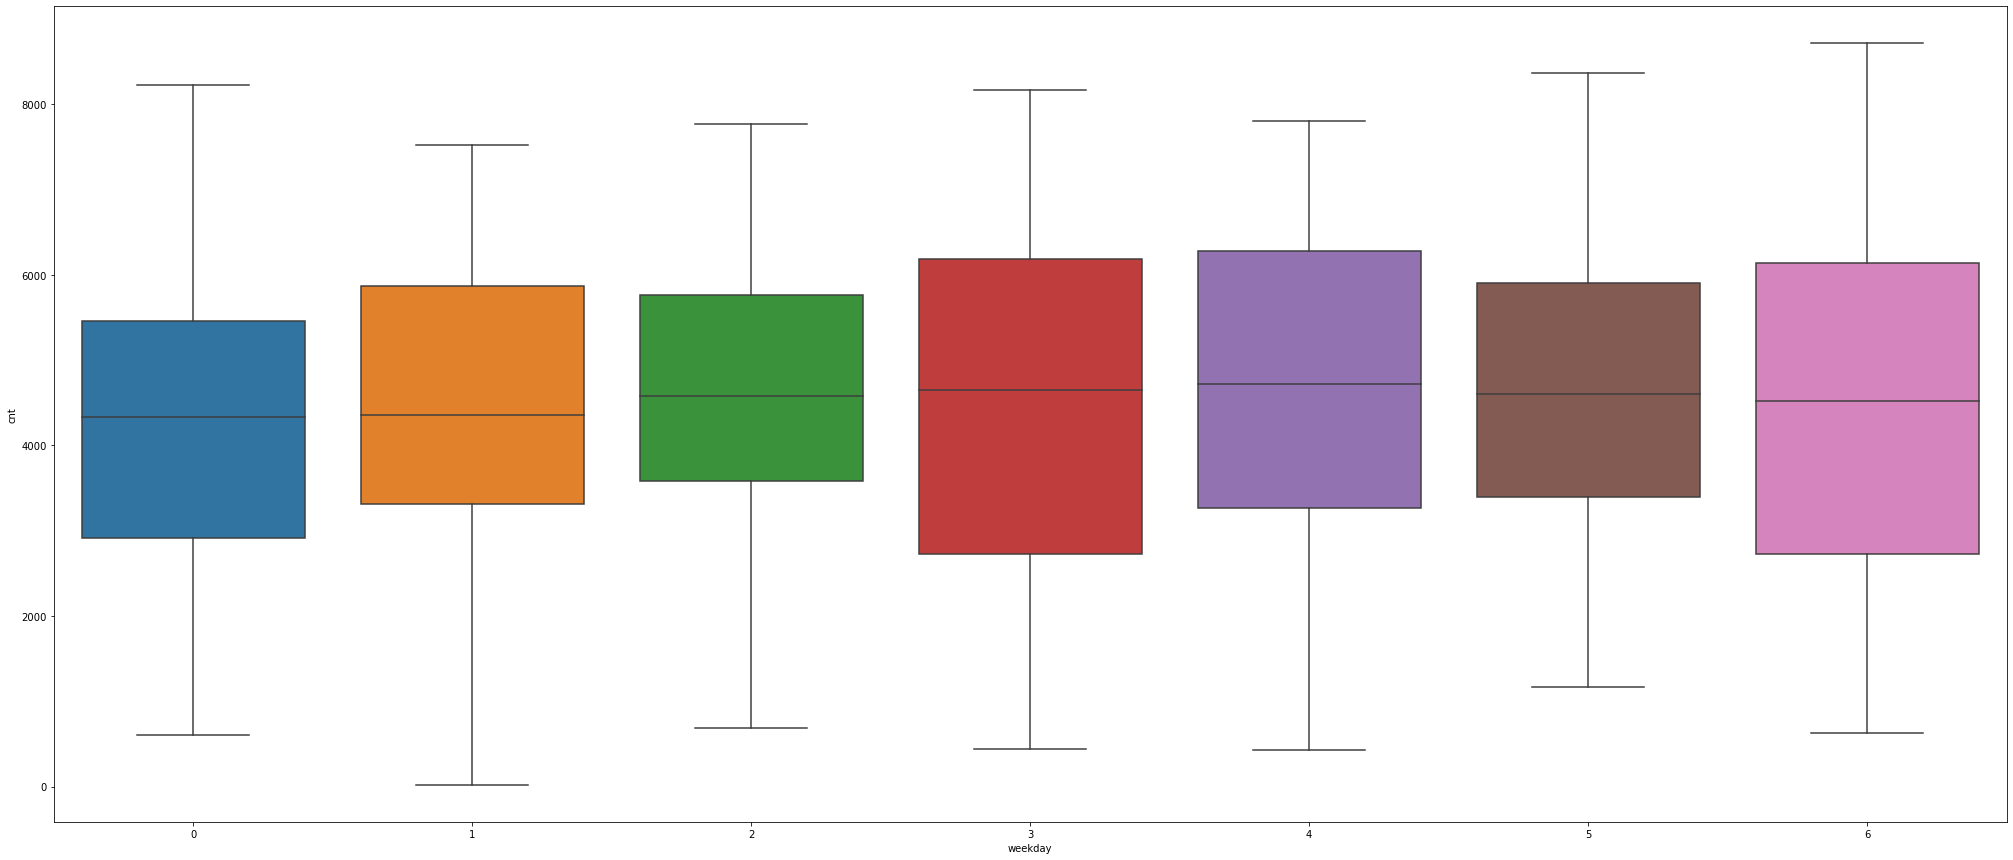

In [295]:
# Boxplot of weekday which is a categorical variable

plt.figure(figsize=(35, 15))
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='weekday', ylabel='cnt'>

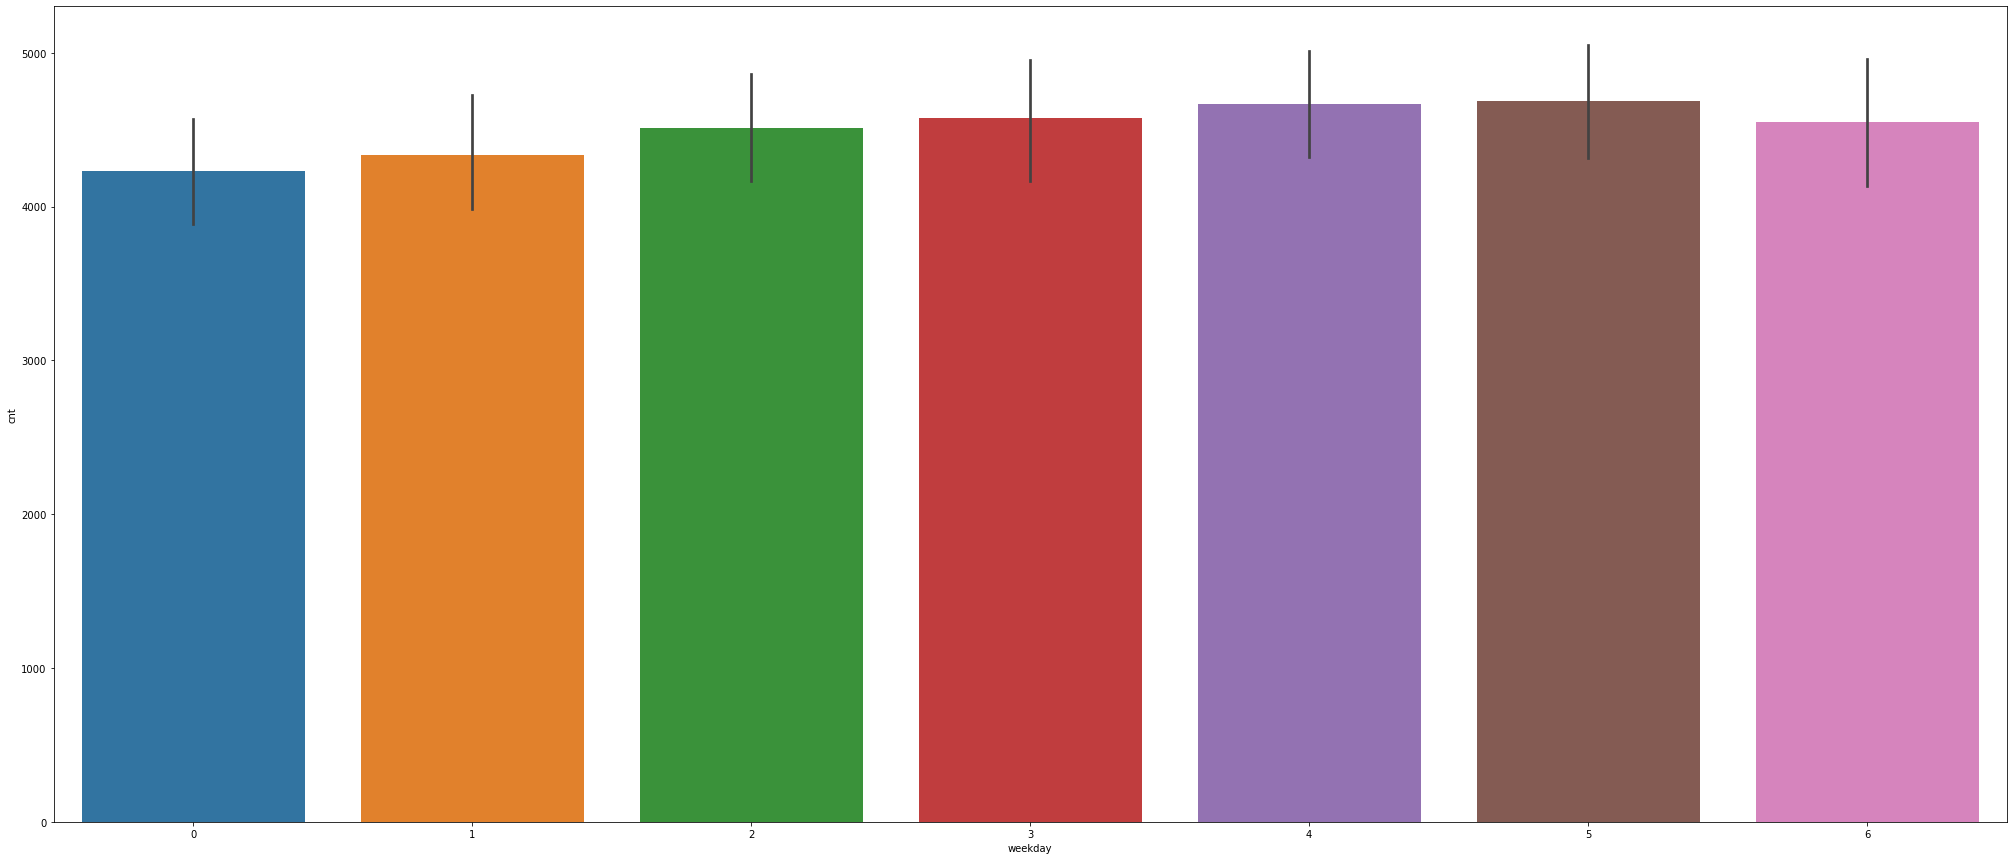

In [296]:
# Barplot of weekday which is a categorical variable

plt.figure(figsize=(35, 15))
sns.barplot(x = 'weekday', y = 'cnt', data = bike_share_df)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

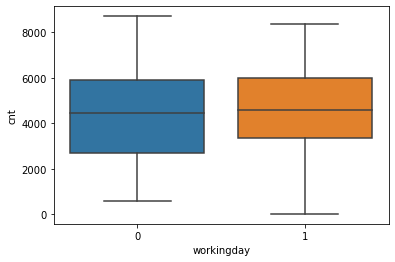

In [297]:
# Boxplot of workingday which is a categorical variable

plt.figure()
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

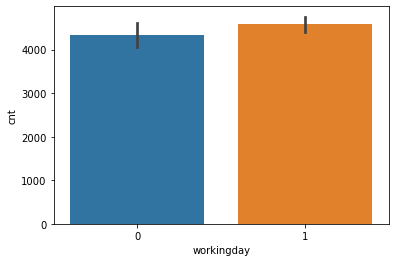

In [298]:
# Barplot of workingday which is a categorical variable

plt.figure()
sns.barplot(x = 'workingday', y = 'cnt', data = bike_share_df)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

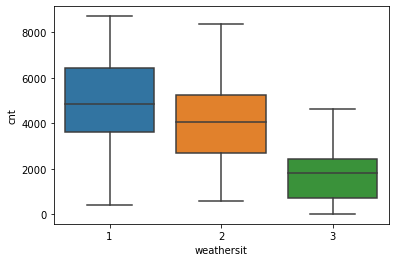

In [299]:
# Boxplot of weathersit which is a categorical variable

plt.figure()
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_df)


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

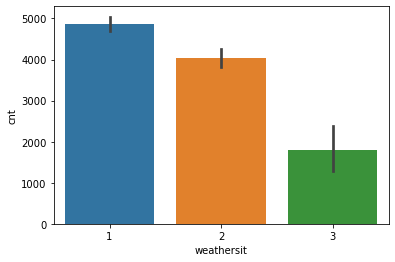

In [300]:
# Barplot of weathersit which is a categorical variable

plt.figure()
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_share_df)


# Here we can replace the values of few columns with data for categorical easy understandability

In [301]:
bike_share_df.season = bike_share_df.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

bike_share_df.weathersit = bike_share_df.weathersit.replace({1:'Clear',2:'Mist',3:'Rain',4:'Heavy_rain'})

bike_share_df.mnth = bike_share_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_share_df.weekday = bike_share_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [302]:
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Creating dummy variables

In [303]:
# Here we can create dummies for 4 categorical variables for our analysis
# Dropping first column of 2 columns dummies using drop_first=True command

bike_share_df = pd.get_dummies(data=bike_share_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)


In [304]:
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [305]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [306]:
bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   season_spring    730 non-null    uint8  
 9   season_summer    730 non-null    uint8  
 10  season_winter    730 non-null    uint8  
 11  mnth_aug         730 non-null    uint8  
 12  mnth_dec         730 non-null    uint8  
 13  mnth_feb         730 non-null    uint8  
 14  mnth_jan         730 non-null    uint8  
 15  mnth_jul         730 non-null    uint8  
 16  mnth_jun         730 non-null    uint8  
 17  mnth_mar        


# Splitting data into train and test sets

In [307]:
# importig sklearn for splitting and scaliing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [308]:
# split ratio is 70:30 for train and test sets

df_train,df_test = train_test_split( bike_share_df, test_size=0.3, random_state=100)

In [309]:
df_train.shape  # Size of training data

(511, 30)

In [310]:
df_test.shape    # Size of testing data

(219, 30)

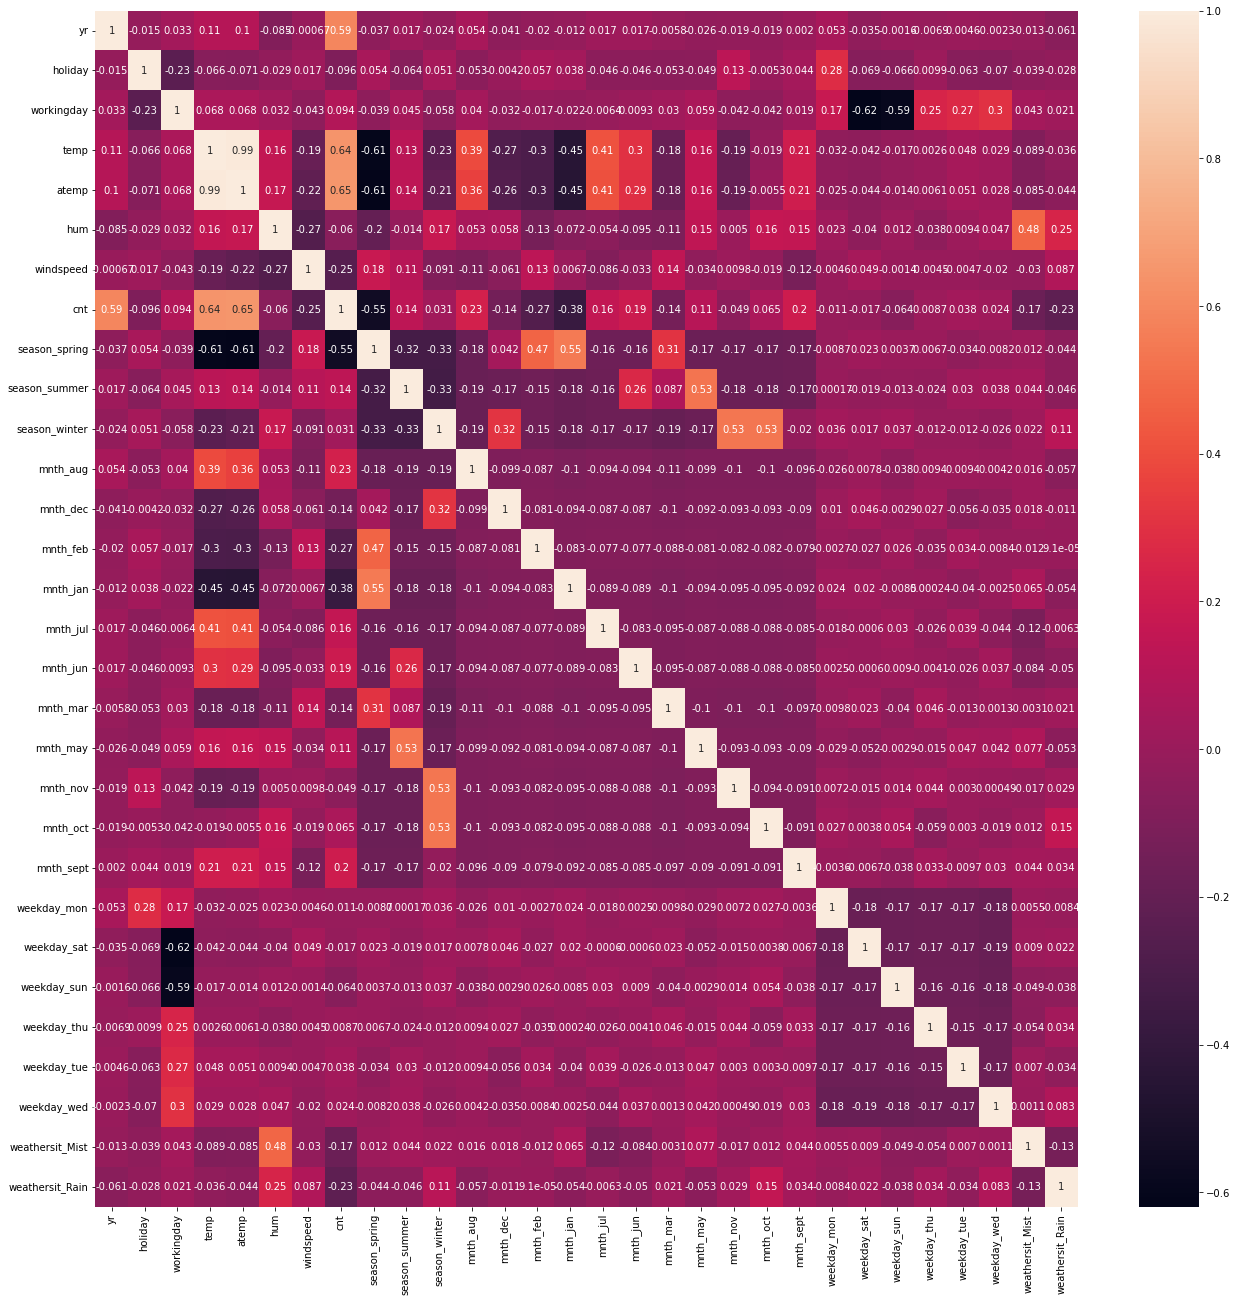

In [311]:
plt.figure(figsize = (22, 22))
sns.heatmap(df_train.corr() , annot = True )
plt.show()

In [312]:
# Instantiating the object

scaler = MinMaxScaler()

In [313]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [314]:
# Apply scaling to all the continuous columns except the dummy variables

Scaling_col = ['temp','atemp','hum','windspeed','cnt']

In [315]:
# Fitting and transforming training set

df_train[Scaling_col] = scaler.fit_transform(df_train[Scaling_col])

In [316]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [317]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.025440,0.677104,0.537386,0.513133,0.650333,0.320844,0.514186,0.242661,0.246575,0.248532,0.095890,0.084149,0.066536,0.088063,0.076321,0.076321,0.097847,0.084149,0.086106,0.086106,0.080235,0.150685,0.154599,0.142857,0.133072,0.133072,0.158513,0.344423,0.029354
std,0.500412,0.157613,0.468042,0.225640,0.212202,0.145741,0.169639,0.224737,0.429112,0.431440,0.432585,0.294729,0.277883,0.249461,0.283664,0.265771,0.265771,0.297399,0.277883,0.280795,0.280795,0.271923,0.358092,0.361876,0.350270,0.339986,0.339986,0.365579,0.475645,0.168963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341151,0.332910,0.538858,0.199179,0.356765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542077,0.529300,0.653499,0.298098,0.519673,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754401,0.414438,0.688737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Here we can see all the maximum values are '1' and all the minimum values are '0'

# Now dividing into X and Y sets for the model building

In [318]:
y_train = df_train.pop('cnt')  # As cnt is our target variable
x_train = df_train

# Model Building

- We Use RFE from SKlearn to build and eliminate few columns

In [319]:
# Importing RFE and LinearRegression functions 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [320]:
lrm = LinearRegression()
lrm.fit(x_train,y_train)

LinearRegression()

In [321]:
# Reduce the number of features to 20 using RFE

rfe = RFE(lrm,20)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [322]:
# Slected columns by RFE

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 4),
 ('mnth_mar', False, 5),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 6),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_Mist', True, 1),
 ('weathersit_Rain', True, 1)]

In [323]:
rfe_col = x_train.columns[rfe.support_] # removing unwanted columns 
rfe_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

In [324]:
x_train.columns[~rfe.support_] # These are the removed columns 

Index(['mnth_aug', 'mnth_jun', 'mnth_mar', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [325]:
x_train_rfe = x_train[rfe_col]

In [326]:
x_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sept,weekday_sat,weathersit_Mist,weathersit_Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,1,0


In [327]:
x_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_may', 'mnth_nov', 'mnth_sept',
       'weekday_sat', 'weathersit_Mist', 'weathersit_Rain'],
      dtype='object')

# Now building model using statsmodel

# MODEL 1

In [328]:
# Importing statsmodel library
import statsmodels.api as sm 

# importing libraries to calculate VIF's
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [329]:
# Creating a dataframe that contains the names of all the feature variables and their VIF's like a table

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, var) for var in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,380.281
4,atemp,369.501
5,hum,31.836
7,season_spring,5.733
2,workingday,5.405
6,windspeed,5.135
9,season_winter,4.276
8,season_summer,3.588
12,mnth_jan,2.403
18,weathersit_Mist,2.331


In [330]:
x_train_lm = sm.add_constant(x_train_rfe)  # Used to fit line on the intercept

In [331]:
lm = sm.OLS(y_train,x_train_lm).fit()    # Running the linear model

In [332]:
# Summary of our linear model 1

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.54e-188
Time:                        23:55:43   Log-Likelihood:                 526.22
No. Observations:                 511   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -921.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2981      0.039     

# MODEL 2

- Here we can retain 'temp' as it is necassary for our analysis.
- We drop 'atemp' as it's VIF is very high

In [333]:
x_train_rfe2 = x_train_rfe.drop(["atemp"], axis = 1)

In [334]:
x_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_may,mnth_nov,mnth_sept,weekday_sat,weathersit_Mist,weathersit_Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,1,0,0,0,0,0,0,1,1,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,1,0,0,0,0,0,0,0,0,0,1,0


In [335]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, var) for var in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,31.785
3,temp,19.869
6,season_spring,5.617
2,workingday,5.404
5,windspeed,4.887
8,season_winter,4.118
7,season_summer,3.437
11,mnth_jan,2.400
17,weathersit_Mist,2.330
0,yr,2.111


In [336]:
x_train_lm2 = sm.add_constant(x_train_rfe2)

lm2 = sm.OLS(y_train,x_train_lm2).fit()

# Summary of our linear model 2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.27e-189
Time:                        23:55:44   Log-Likelihood:                 526.20
No. Observations:                 511   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2978      0.038     

# MODEL 3

- Here we can see 'hum' have high VIF hence drop it

In [337]:
x_train_rfe3 = x_train_rfe2.drop(["hum"], axis = 1)

In [338]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, var) for var in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.476
2,workingday,5.373
4,windspeed,4.826
5,season_spring,4.567
7,season_winter,3.072
6,season_summer,2.924
10,mnth_jan,2.242
0,yr,2.094
15,weekday_sat,2.005
9,mnth_feb,1.888


In [339]:
x_train_lm3 = sm.add_constant(x_train_rfe3)

lm3 = sm.OLS(y_train,x_train_lm3).fit()

# Summary of our linear model 3
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.87e-187
Time:                        23:55:44   Log-Likelihood:                 517.57
No. Observations:                 511   AIC:                            -997.1
Df Residuals:                     492   BIC:                            -916.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2222      0.034     

# MODEL 4

- Here we can see VIF of working day high so drop it

In [340]:
x_train_rfe4 = x_train_rfe3.drop(["workingday"], axis = 1)

In [341]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, var) for var in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.371
3,windspeed,4.800
4,season_spring,4.351
6,season_winter,2.989
5,season_summer,2.801
9,mnth_jan,2.210
0,yr,2.093
8,mnth_feb,1.882
12,mnth_nov,1.816
10,mnth_jul,1.601


In [342]:
x_train_lm4 = sm.add_constant(x_train_rfe4)

lm4 = sm.OLS(y_train,x_train_lm4).fit()

# Summary of our linear model 4
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     154.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.15e-184
Time:                        23:55:44   Log-Likelihood:                 508.97
No. Observations:                 511   AIC:                            -981.9
Df Residuals:                     493   BIC:                            -905.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2606      0.034     

# MODEL 5

- Here p-value of mnth_may is high so drop it

In [343]:
x_train_rfe5 = x_train_rfe4.drop(["mnth_may"], axis = 1)

In [344]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, var) for var in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.255
3,windspeed,4.704
4,season_spring,4.343
6,season_winter,2.989
5,season_summer,2.245
9,mnth_jan,2.210
0,yr,2.082
8,mnth_feb,1.881
11,mnth_nov,1.815
10,mnth_jul,1.598


In [345]:
x_train_lm5 = sm.add_constant(x_train_rfe5)

lm5 = sm.OLS(y_train,x_train_lm5).fit()

# Summary of our linear model 5
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.22e-185
Time:                        23:55:45   Log-Likelihood:                 508.63
No. Observations:                 511   AIC:                            -983.3
Df Residuals:                     494   BIC:                            -911.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2560      0.033     

# MODEL 6

- Here p-value of 'weekday_sat' is high so drop it

In [346]:
x_train_rfe6 = x_train_rfe5.drop(["weekday_sat"], axis = 1)

In [347]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, var) for var in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.227
3,windspeed,4.681
4,season_spring,4.328
6,season_winter,2.980
5,season_summer,2.243
9,mnth_jan,2.209
0,yr,2.080
8,mnth_feb,1.880
11,mnth_nov,1.815
10,mnth_jul,1.597


In [348]:
x_train_lm6 = sm.add_constant(x_train_rfe6)

lm6 = sm.OLS(y_train,x_train_lm6).fit()

# Summary of our linear model 6
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          4.11e-186
Time:                        23:55:45   Log-Likelihood:                 507.06
No. Observations:                 511   AIC:                            -982.1
Df Residuals:                     495   BIC:                            -914.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2596      0.033     

# MODEL 7

- Here p-value of 'mnth_feb' is high so drop it

In [349]:
x_train_rfe7 = x_train_rfe6.drop(["mnth_feb"], axis = 1)

In [350]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, var) for var in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.177
3,windspeed,4.675
6,season_winter,2.935
4,season_spring,2.888
5,season_summer,2.241
0,yr,2.078
10,mnth_nov,1.799
8,mnth_jan,1.656
9,mnth_jul,1.594
12,weathersit_Mist,1.564


In [351]:
x_train_lm7 = sm.add_constant(x_train_rfe7)

lm7 = sm.OLS(y_train,x_train_lm7).fit()

# Summary of our linear model 7
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.41e-186
Time:                        23:55:46   Log-Likelihood:                 505.44
No. Observations:                 511   AIC:                            -980.9
Df Residuals:                     496   BIC:                            -917.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2457      0.032     

# MODEL 8

- Here p-value of 'mnth_nov' is high so drop it

In [352]:
x_train_rfe8 = x_train_rfe7.drop(["mnth_nov"], axis = 1)

In [353]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, var) for var in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.148
3,windspeed,4.627
4,season_spring,2.887
5,season_summer,2.240
0,yr,2.077
6,season_winter,2.059
8,mnth_jan,1.651
9,mnth_jul,1.593
11,weathersit_Mist,1.564
10,mnth_sept,1.340


In [354]:
x_train_lm8 = sm.add_constant(x_train_rfe8)

lm8 = sm.OLS(y_train,x_train_lm8).fit()

# Summary of our linear model 8
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.05e-186
Time:                        23:55:46   Log-Likelihood:                 502.99
No. Observations:                 511   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -918.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2280      0.031     

# MODEL 9

- Here p-value of mnth_dec is high so drop it

In [355]:
x_train_rfe9 = x_train_rfe8.drop(["mnth_dec"], axis = 1)

In [356]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe9.values, var) for var in range(x_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.140
3,windspeed,4.623
4,season_spring,2.752
5,season_summer,2.237
0,yr,2.077
6,season_winter,1.791
7,mnth_jan,1.609
8,mnth_jul,1.591
10,weathersit_Mist,1.562
9,mnth_sept,1.339


In [357]:
x_train_lm9 = sm.add_constant(x_train_rfe9)

lm9 = sm.OLS(y_train,x_train_lm9).fit()

# Summary of our linear model 9
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.46e-187
Time:                        23:55:49   Log-Likelihood:                 501.35
No. Observations:                 511   AIC:                            -976.7
Df Residuals:                     498   BIC:                            -921.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2147      0.030     

- Here we are observing temp is >5 but we need temp for analysis and it is a very crucial factor.
so now lets drop windspeed which is nearly equal to 5 so that temp may get VIF <5

# MODEL 10

In [358]:
x_train_rfe10 = x_train_rfe9.drop(["windspeed"], axis = 1)

In [359]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe10.values, var) for var in range(x_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.290
0,yr,2.074
3,season_spring,1.988
4,season_summer,1.940
6,mnth_jan,1.603
7,mnth_jul,1.589
5,season_winter,1.577
9,weathersit_Mist,1.561
8,mnth_sept,1.338
10,weathersit_Rain,1.067


- As we thought we got VIF of temp as <5

In [360]:
x_train_lm10 = sm.add_constant(x_train_rfe10)

lm10 = sm.OLS(y_train,x_train_lm10).fit()

# Summary of our linear model 10
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.50e-180
Time:                        23:55:51   Log-Likelihood:                 482.82
No. Observations:                 511   AIC:                            -941.6
Df Residuals:                     499   BIC:                            -890.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1580      0.030     

# MODEL 11

- Here p-value of 'mnth_jan' is high so drop it

In [361]:
x_train_rfe11 = x_train_rfe10.drop(["mnth_jan"], axis = 1)

In [362]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe11.values, var) for var in range(x_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.224
0,yr,2.069
4,season_summer,1.936
6,mnth_jul,1.582
5,season_winter,1.576
8,weathersit_Mist,1.550
3,season_spring,1.395
7,mnth_sept,1.336
9,weathersit_Rain,1.066
1,holiday,1.042


In [363]:
x_train_lm11 = sm.add_constant(x_train_rfe11)

lm11 = sm.OLS(y_train,x_train_lm11).fit()

# Summary of our linear model 11
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.21e-181
Time:                        23:55:52   Log-Likelihood:                 481.96
No. Observations:                 511   AIC:                            -941.9
Df Residuals:                     500   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1495      0.029     

# MODEL 12

- Here drop 'season_summer' as its p-value is not nearly 0

In [364]:
x_train_rfe12 = x_train_rfe11.drop(["season_summer"], axis = 1)

In [365]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe12.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe12.values, var) for var in range(x_train_rfe12.shape[1])]
vif['VIF'] = round(vif['VIF'], 3)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.992
0,yr,2.051
7,weathersit_Mist,1.508
5,mnth_jul,1.334
4,season_winter,1.331
3,season_spring,1.246
6,mnth_sept,1.186
8,weathersit_Rain,1.063
1,holiday,1.042


In [366]:
x_train_lm12 = sm.add_constant(x_train_rfe12)

lm12 = sm.OLS(y_train,x_train_lm12).fit()

# Summary of our linear model 12
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          2.04e-181
Time:                        23:55:53   Log-Likelihood:                 479.16
No. Observations:                 511   AIC:                            -938.3
Df Residuals:                     501   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1947      0.022     

# CONCLUSIONS:-

- Here we can see p-values are null as we require 

- VIF of all the features are <3 which is pretty good for the model

- R-squared is 0.822 and Adjusted R-squared is 0.819 which is good for the model

- F-statistic of the model is pretty good

- Hence, the model is pretty good as for now and no more features are need to be removed from this model a

HENCE AS FOR NOW WE ACCEPT MODEL 12 AND GO FOR FURTHER VALIDATIONS

# Residual Analysis for training data

- As we know one of the major assumptions of the linear regression are "Error terms are normally distributed with mean zero"

In [367]:
y_train_cnt = lm12.predict(x_train_lm12)

In [368]:
y_train_cnt.shape

(511,)

In [369]:
res = y_train-y_train_cnt # residues or error terms

In [370]:
# Importing the required libraries for plots.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

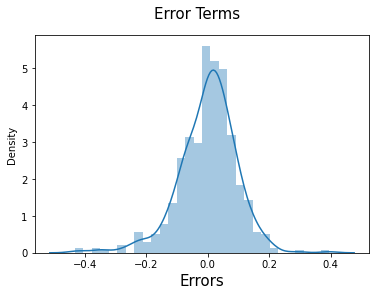

In [371]:
# Plotting histogram of the error terms

fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 15)  

- ### Here we can see the residual terms are normally distributed with mean zero. Hence, we can confirm our model is valid.

# MAKING PREDICTIONS

- Applying Scaler to the continuous columns in the test data

In [372]:
num_vars = [ 'temp' , 'atemp' , 'hum' , 'windspeed' , 'cnt' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])  # Because of test data we use only transform

In [373]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [374]:
y_test = df_test.pop('cnt')
x_test = df_test

In [375]:
x_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Mist,weathersit_Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.243430,0.708888,0.287411,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.577380,0.650923,0.069510,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [376]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [377]:
# Now use our final agreed model to make predictions.

# Creating dataframe by dropping variables from x_test based on x_train
x_test_last = x_test[x_train_rfe12.columns]

# Adding a constant variable 
x_test_lm = sm.add_constant(x_test_last)

In [378]:
x_test_last.head()

,yr,holiday,temp,season_spring,season_winter,mnth_jul,mnth_sept,weathersit_Mist,weathersit_Rain
184,0,1,0.831783,0,0,1,0,1,0
535,1,0,0.901354,0,0,0,0,0,0
299,0,0,0.511964,0,1,0,0,1,0
221,0,0,0.881625,0,0,0,0,0,0
152,0,0,0.817246,0,0,0,0,0,0


In [379]:
x_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            219 non-null    float64
 1   yr               219 non-null    int64  
 2   holiday          219 non-null    int64  
 3   temp             219 non-null    float64
 4   season_spring    219 non-null    uint8  
 5   season_winter    219 non-null    uint8  
 6   mnth_jul         219 non-null    uint8  
 7   mnth_sept        219 non-null    uint8  
 8   weathersit_Mist  219 non-null    uint8  
 9   weathersit_Rain  219 non-null    uint8  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 9.8 KB


In [380]:
y_pred = lm12.predict(x_test_lm)   # make test predictions using our final model

In [381]:
y_pred

184    0.336830
535    0.852169
299    0.411531
221    0.609180
152    0.578910
         ...   
400    0.358970
702    0.727253
127    0.469549
640    0.755093
72     0.238639
Length: 219, dtype: float64

# Evaluating Model

Text(0, 0.5, 'y_pred')

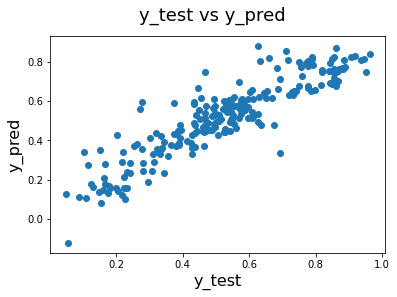

In [382]:
# Plotting actual versus predicted values to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18) 
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_pred', fontsize = 16) 

# Finding r2-Score

In [383]:
from sklearn.metrics import r2_score           # importing r2_score from sklearn
r2=r2_score(y_test, y_pred)
r2

0.8095501362363489

# Finding Adjusted r2

In [384]:
# Adjusted-R2 value for the test data

adjusted_r2 = 1-(1-r2)*(x_test_last.shape[0]-1)/(x_test_last.shape[0]-x_test_last.shape[1]-1)
print(adjusted_r2)

0.801348945930737


- Here we can observe r2 and adj-r2 are almost equal

# Let's Find the final model equation

In [385]:

lm12.params

const              0.194663
yr                 0.233713
holiday           -0.101066
temp               0.470173
season_spring     -0.111913
season_winter      0.054748
mnth_jul          -0.069257
mnth_sept          0.065122
weathersit_Mist   -0.078591
weathersit_Rain   -0.299970
dtype: float64

# Final model

# --------------------------------------------------------------------------------------------------------

cnt = 0.194663 + (0.233713 x yr) - (0.101066 x holiday ) + (0.470173 x temp) - (0.111913 x season_spring) + (0.054748 x season_winter) - (0.069257 x mnth_jul) + (0.065122 x mnth_sept) - (0.078591 x weathersit_Mist) - (0.299970 x weathersit_Rain)
# --------------------------------------------------------------------------------------------------------

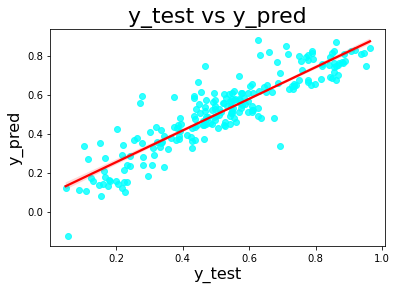

In [386]:
# Fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=75, fit_reg=True,scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=22)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# FINAL CONCLUSION

Here, from the final model equation
- cnt = count of total rental bikes including both casual and registered
- yr = year
- holiday = Is the particular day is holiday or not 
- temp = temperature in Celsius
- season_spring = It is in spring season
- season_winter = It is in winter season
- mnth_jul = July month 
- mnth_sept = september month
- weathersit_Mist = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- weathersit_Rain = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


# Use of this predictor variables

- year = With unit increase in yr variable increases the bike hiring numbers by 0.233713 units

- holiday = With unit increase in holiday variable decreases the bike hiring numbers by 0.101066 units

- temperature = With unit increase in temp variable increases the bike hiring numbers by 0.470173 units

- season_spring =  With unit increase in season_spring variable decreases the bike hiring numbers by 0.111913 units

- season_winter = With unit increase in season_winter variable increases the bike hiring numbers by 0.054748 units

- July = With unit increase in mnth_jul variable decreases the bike hiring numbers by 0.069257 units

- September = With unit increase in mnth_sept variable increases the bike hiring numbers by 0.065122 units

-  weathersit_Mist = With unit increase in weathersit_Mist variable decreases the bike hiring numbers by 0.078591 units

-  weathersit_Rain = With unit increase in  weathersit_Rain variable decreases the bike hiring numbers by 0.299970 units

# The Most Important predictor variables:

- Temp :- As coefficient value of temp is very highly positive i.e '0.470173'. It play's a vital role in prediction

- weathersit_Rain :- As coefficient value of weathersit_Rain is highly negative i.e '-0.299970'. As we know during Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds people on roads are less. It is also important for prediction

- yr :- As it shows positive coefficient i.e '0.233713' it indicates the business in a profitable state compared to the previous year 

                                    x-----------------x------------------x